In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import talib
import numpy as np

Выгрузка данных будет проводиться из сайта Binance. Для получения основных данных о криптовалюты, я воспользуюсь открытым API и выгружу данные в виде "свечей".

***Klines ("свечные данные") — это формат представления ценовых данных на финансовых рынках, включая криптовалюты.***

**Примеры криптовалют, для анализа**

- BTCUSD - Bitcoin к доллару США

- ETHUSD - Ethereum к доллару США

- LTCUSD - Litecoin к доллару США

- XRPUSD - Ripple к доллару США

- ADAUSD - Cardano к доллару США

**Описание данных**

0. Open time	Время открытия свечи
	
1.	Open	Цена открытия периода	

2.	High	Максимальная цена за период	

3.	Low	Минимальная цена за период	

4.	Close	Цена закрытия периода	

5.	Volume	Объем торгов в базовой валюте 	

6.	Close time	Время закрытия свечи
 	
7.	Quote asset volume	Объем в котируемой валюте

8.	Number of trades	Количество сделок за период	

9.	Taker buy base volume	Объем покупок в базовой валюте	

10.	Taker buy quote volume	Объем покупок в котируемой валюте

In [4]:
start_date = '2025-01-01'
end_date = '2025-06-01'
interval = '1d'
symbols = ['BTCUSDT', 'ETHUSDT', 'LTCUSDT', 'XRPUSDT', 'ADAUSDT']

url = "https://api.binance.com/api/v3/klines"
start_timestamp = int(pd.Timestamp(start_date).timestamp() * 1000)
end_timestamp = int(pd.Timestamp(end_date).timestamp() * 1000)
    
params = {
    'symbol': 'ETHUSDT',
    'interval': interval,
    'limit': 1000,
    'startTime': start_timestamp,
    'endTime': end_timestamp
    }
data = requests.get(url, params=params).json()   

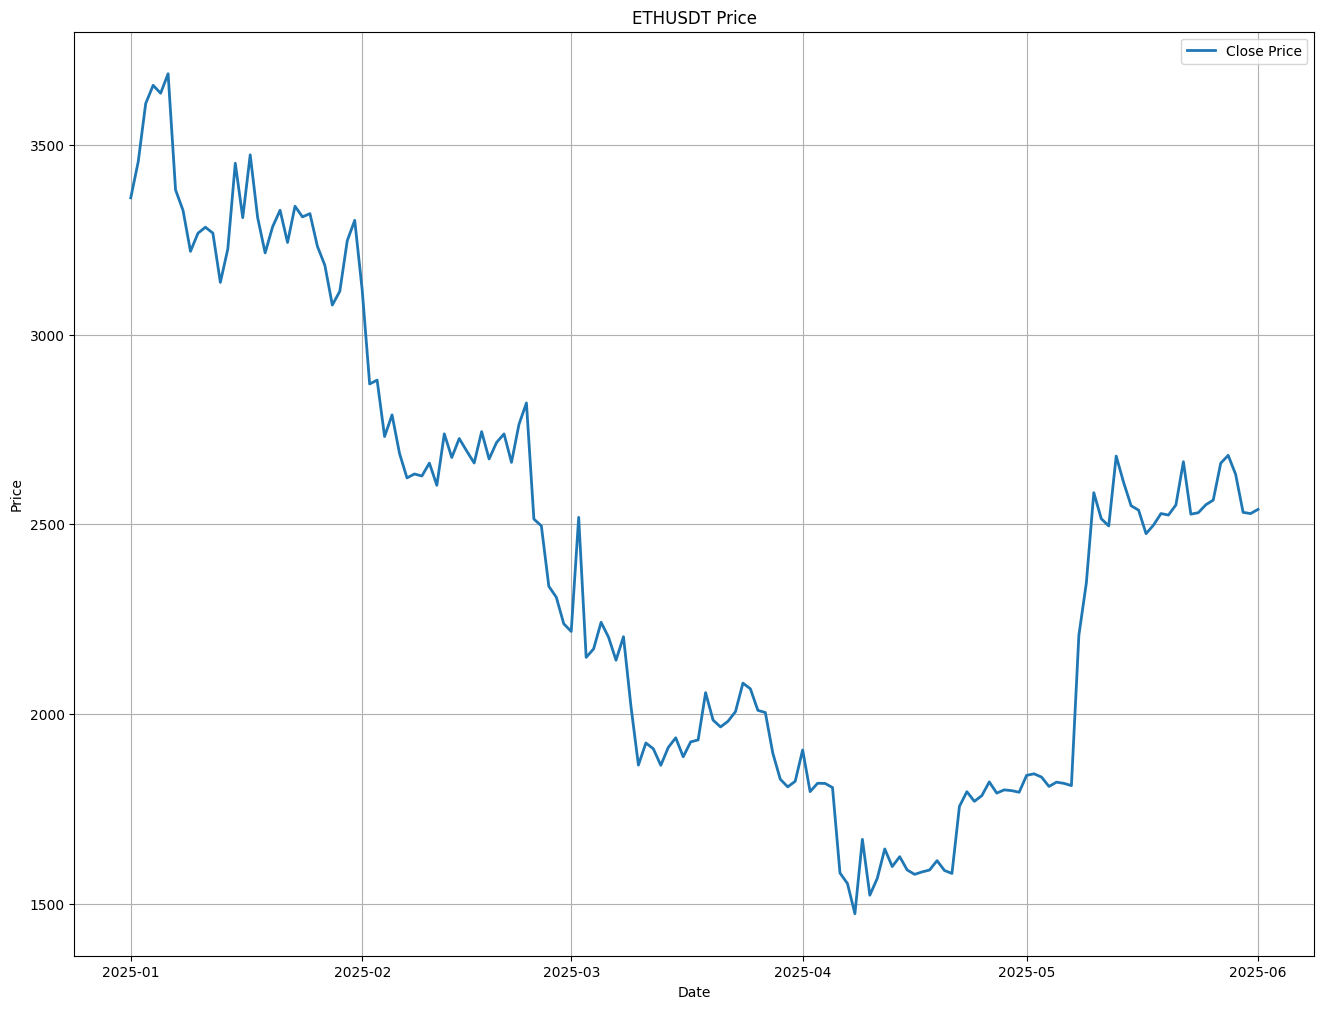

In [5]:
df = pd.DataFrame(data, columns=[
        'Open time', 'Open', 'High', 'Low', 'Close', 'Volume',
        'Close time', 'Quote asset volume', 'Number of trades',
        'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'
    ])

df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df['Close time'] = pd.to_datetime(df['Close time'], unit='ms')
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, axis=1)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)  # Создаем оси внутри фигуры
ax.plot(df['Open time'], df['Close'], label='Close Price', linewidth=2)
ax.set_title('ETHUSDT Price')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.grid(True)
ax.legend()
plt.show()
    

In [6]:
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Awesome Oscillator (AO)
df['AO'] = talib.SMA(df['Close'], timeperiod=5) - talib.SMA(df['Close'], timeperiod=34)

# Acceleration/Deceleration (AC)
median_price = (df['High'] + df['Low']) / 2
ao = talib.SMA(median_price, 5) - talib.SMA(median_price, 34)
df['AC'] = ao - talib.SMA(ao, 5)

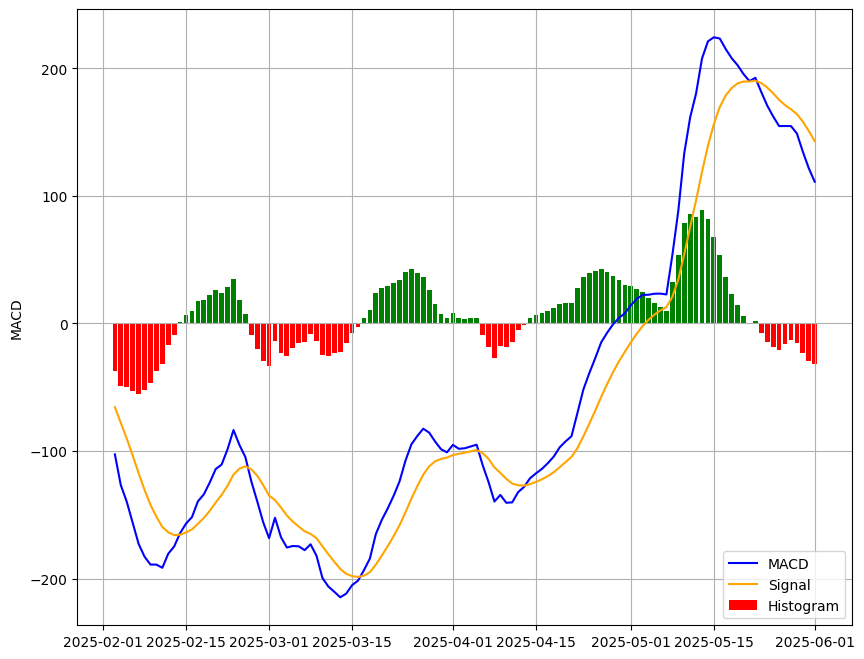

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(df['Open time'], df['MACD'], label='MACD', color='blue')
ax.plot(df['Open time'], df['MACD_Signal'], label='Signal', color='orange')
ax.bar(df['Open time'], df['MACD_Hist'], label='Histogram', color=np.where(df['MACD_Hist'] > 0, 'g', 'r'))
ax.set_ylabel('MACD')
ax.grid(True)
ax.legend()
plt.show()

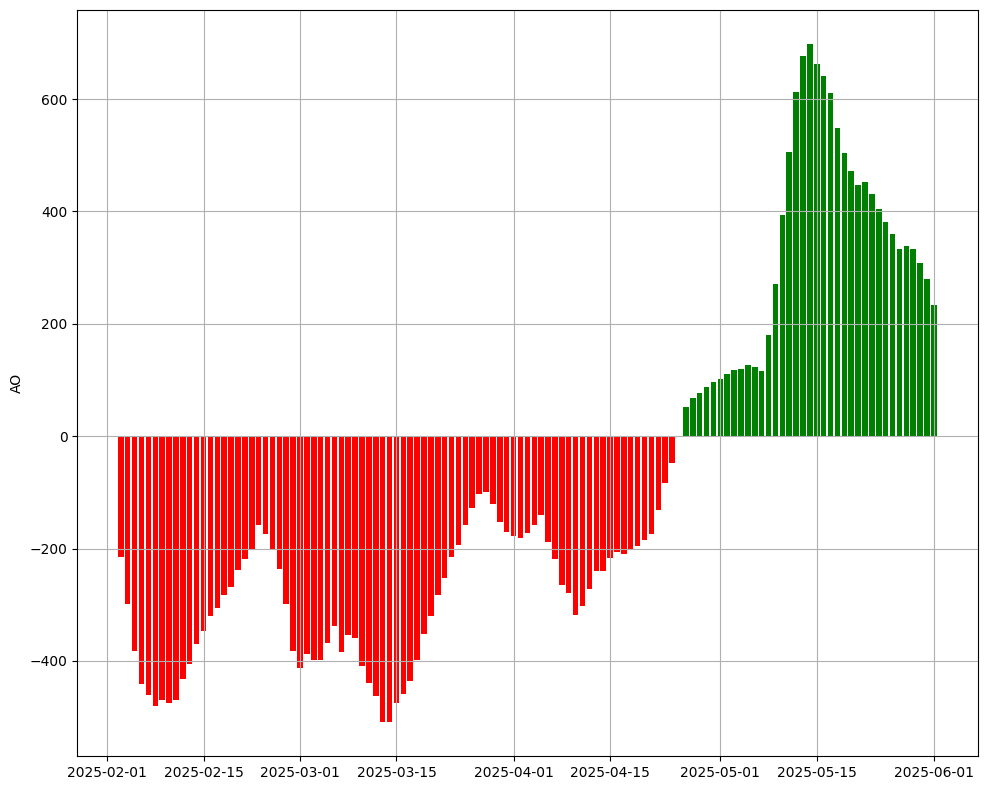

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.bar(df['Open time'], df['AO'], label='AO', color=np.where(df['AO'] > 0, 'g', 'r'))
ax.set_ylabel('AO')
ax.grid(True)
plt.tight_layout()
plt.show()

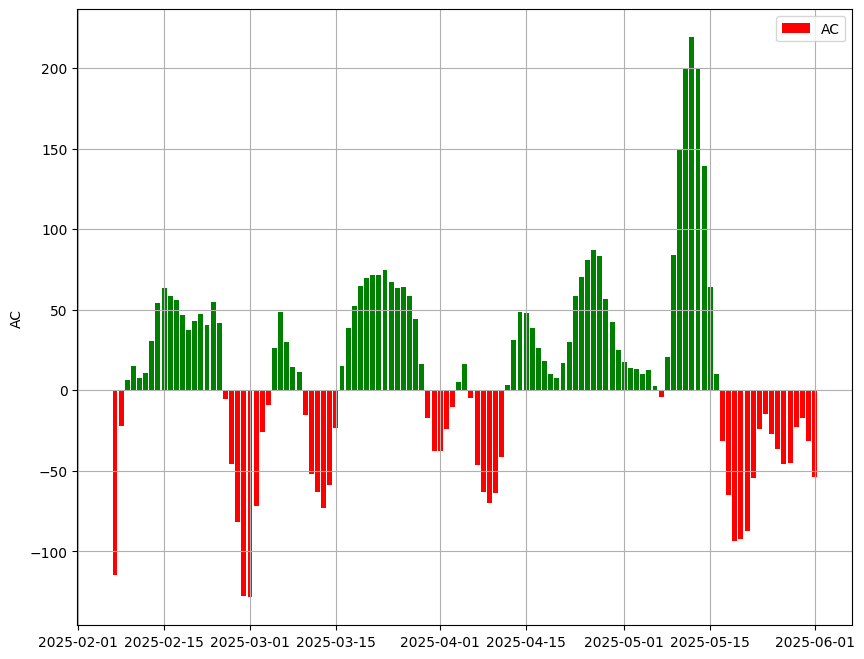

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.bar(df['Open time'], df['AC'], label='AC', color=np.where(df['AC'] > 0, 'g', 'r'))
ax.set_ylabel('AC')
ax.grid(True)